In [1]:
import numpy as np
import matplotlib.pyplot as plt
import porespy as ps
import os
from src.fractal import *
from matplotlib.gridspec import GridSpec
import matplotlib

In [20]:
def final_plot_threshold(folder, threshold_list_number=32):
    fields = []
    level = 0
    thresh_list = np.logspace(-5, 0, threshold_list_number)
    fig, axs = plt.subplots(1, len(os.listdir(folder)), sharey="row", figsize=[20, 7])
    final_spore_list = [0 for i in range(len(os.listdir(folder)))]
    final_dim_edge_list = [0 for i in range(len(os.listdir(folder)))]
    max_thresholds = [0 for i in range(len(os.listdir(folder)))]
    for idx, file in enumerate(sorted(os.listdir(folder))):
        img = np.load(folder + file, allow_pickle=True)
        fields.append(img.copy())
        dim_list_edge = []
        max_dim = 0

        for threshold in thresh_list:
            field_of_zeros = (np.abs(fields[idx]) >= level) & (
                np.abs(fields[idx]) <= (level + threshold)
            )

            signed_field = np.ones(field_of_zeros.shape)
            signed_field[field_of_zeros] *= -1
            edges = extract_edges(signed_field)

            min_idx = 0
            max_idx = -1
            H_edges, _, log_count_edges, log_scales_edges = compute_dim(
                edges, min_idx, max_idx
            )
            ret_spore_edge = ps.metrics.boxcount(edges)
            if H_edges > max_dim:
                max_dim = H_edges
                max_thresholds[idx] = threshold
                final_dim_edge_list[idx] = [H_edges, log_count_edges, log_scales_edges]
                final_spore_list[idx] = ret_spore_edge

            dim_list_edge.append(H_edges)

        axs[idx].scatter(thresh_list, dim_list_edge)
        axs[idx].grid(True)
        axs[idx].set_xscale("log")
    fig.savefig(f"{folder.replace('/', '')}_threshold_plot.pdf")

    return final_dim_edge_list, final_spore_list, max_thresholds

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

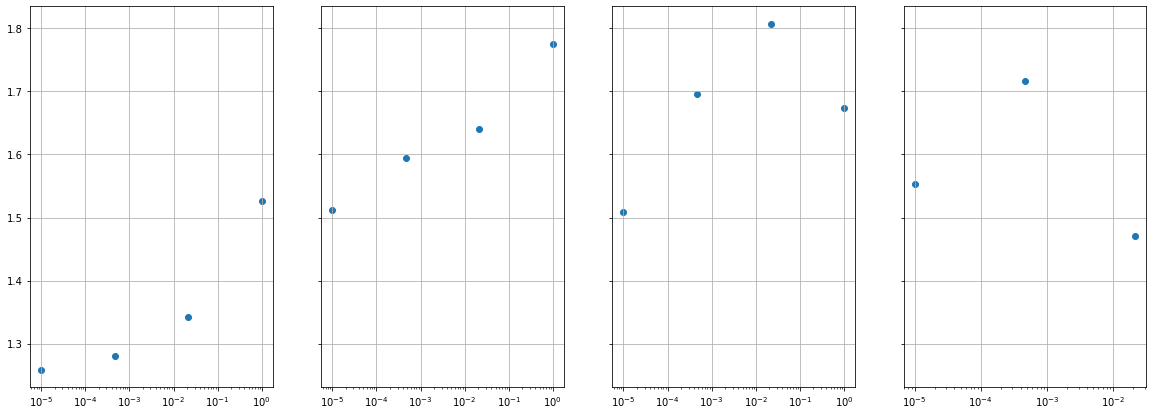

In [21]:
folder = "data/fractal_fc/"
final_dim_edge_list, final_spore_list, max_thresholds = final_plot_threshold(folder, threshold_list_number=4)

In [22]:
def fractal_lin_regs(folder, threshold_list):
    fields = []
    for file in sorted(os.listdir(folder)):
            img = np.load(folder + file, allow_pickle=True)
            fields.append(img.copy())
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
    fig, ax = plt.subplots()
    for field, threshold, c in zip(fields, threshold_list, colors):
        field_of_zeros = np.abs(field) <= threshold

        signed_field = np.ones(field_of_zeros.shape)
        signed_field[field_of_zeros] *= -1
        edges = extract_edges(signed_field)

        min_idx = 0
        max_idx = -1
        # H, log_count, log_scales = compute_dim(field_of_zeros, min_idx, max_idx)
        H_edges, V_edges, log_count_edges, log_scales_edges = compute_dim(
            edges, min_idx, max_idx
        )

        ax.scatter(log_scales_edges, log_count_edges, marker="x", c=c)
        x = np.linspace(log_scales_edges[0], log_scales_edges[-1], 2)
        y = -H_edges * x + V_edges
        ax.plot(x, y, c=c, label=f"{H_edges:.2f}")
        legend = plt.legend(title="Estimated fractal dimension")  # ,
        # loc=4, fontsize='small', fancybox=True)
    fig.savefig(f"{folder.replace('/', '')}_lin_reg_plot.pdf")

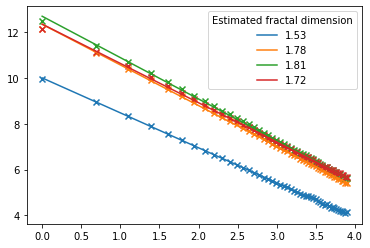

In [23]:
fractal_lin_regs(folder, max_thresholds)